In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fd =pd.read_csv(r"C:\Users\salun\Downloads\final_adjusted_crowd_dataset.csv")


In [6]:
fd.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


In [7]:
fd.isnull().sum()[fd.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  float64
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  label      14249 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.4+ MB


In [9]:
fd['Time'] = fd['Time'].str.replace('-', ':')

In [10]:
fd['Time'] = pd.to_timedelta(fd['Time'])


In [11]:
fd['Time_in_seconds'] = fd['Time'].dt.total_seconds()


In [12]:
fd.isnull().sum()[fd.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Longitude        14249 non-null  float64        
 1   Latitude         14249 non-null  float64        
 2   Speed            14249 non-null  float64        
 3   Distance         14249 non-null  float64        
 4   Time             14249 non-null  timedelta64[ns]
 5   Acc X            14249 non-null  float64        
 6   Acc Y            14249 non-null  float64        
 7   Acc Z            14249 non-null  float64        
 8   Heading          14249 non-null  float64        
 9   gyro_x           14249 non-null  float64        
 10  gyro_y           14249 non-null  float64        
 11  gyro_z           14249 non-null  float64        
 12  label            14249 non-null  int64          
 13  Time_in_seconds  14249 non-null  float64        
dtypes: float64(12), int64(

# Task - Perform univariate analysis for each sensor (plot distributions for all features).
#		Identify outliers visually using box plots and histograms.
		 Examine correlations between different sensor readings using scatter plots and correlation matrices.

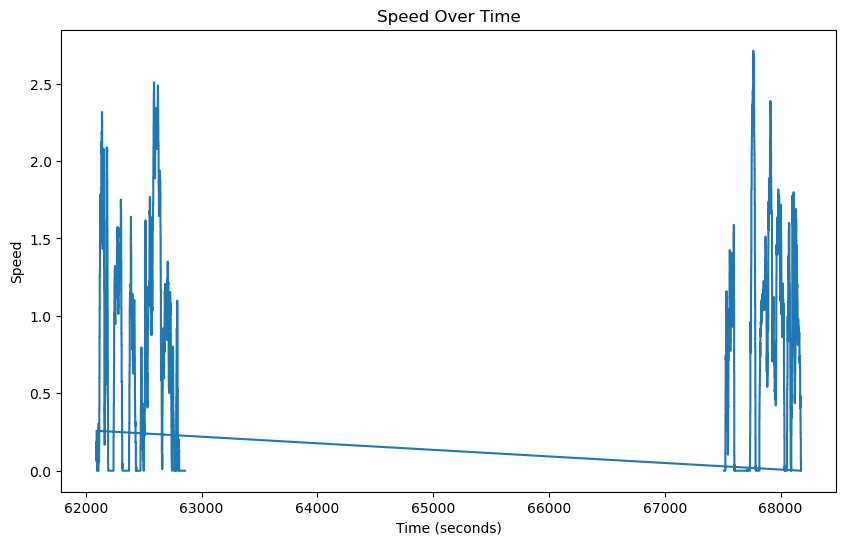

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(fd['Time_in_seconds'], fd['Speed'])
plt.title('Speed Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed')
plt.show()

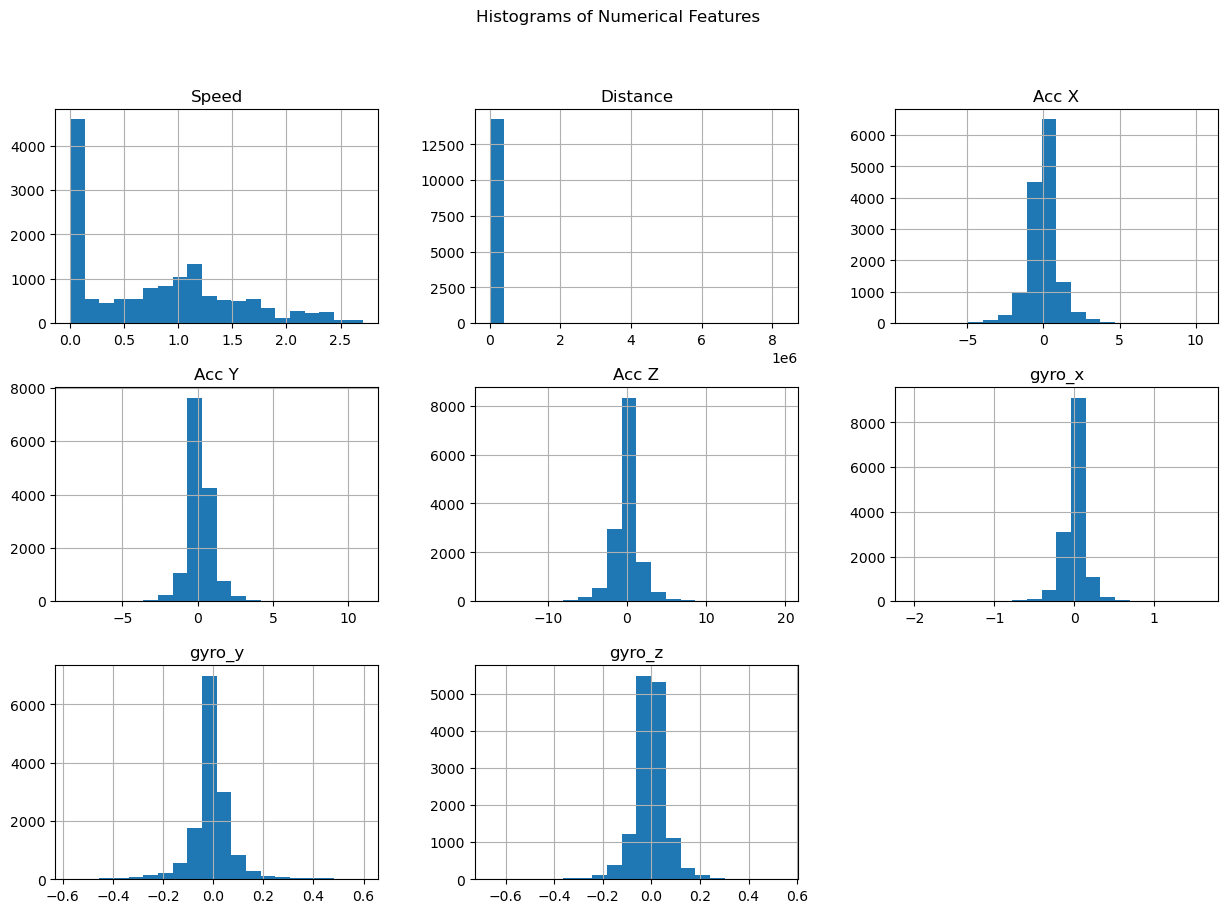

In [15]:
fd[['Speed', 'Distance', 'Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

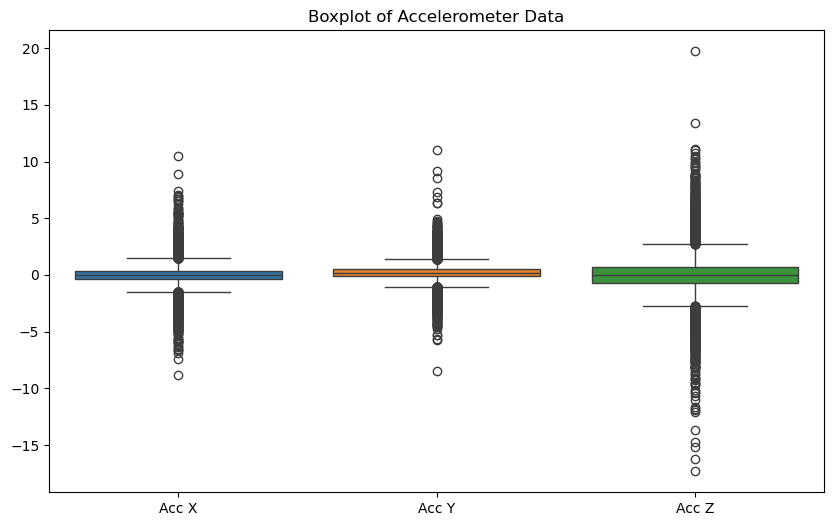

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fd[['Acc X', 'Acc Y', 'Acc Z']])
plt.title('Boxplot of Accelerometer Data')
plt.show()




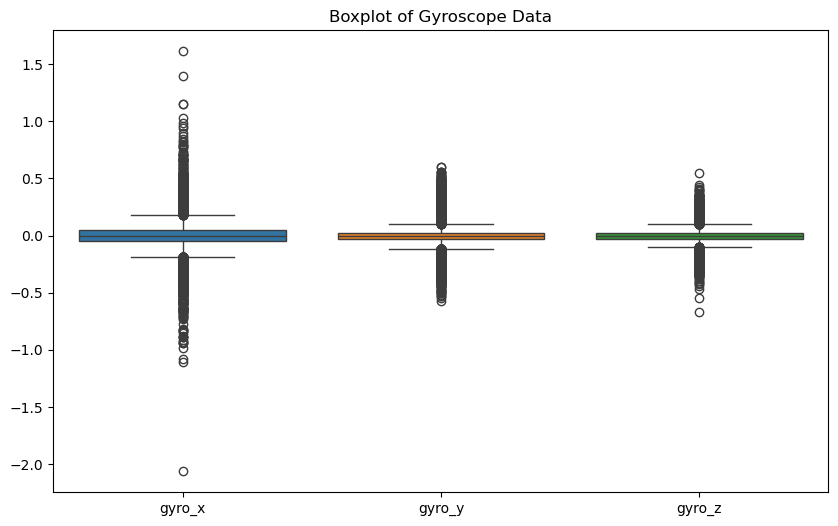

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fd[['gyro_x', 'gyro_y', 'gyro_z']])
plt.title('Boxplot of Gyroscope Data')
plt.show()

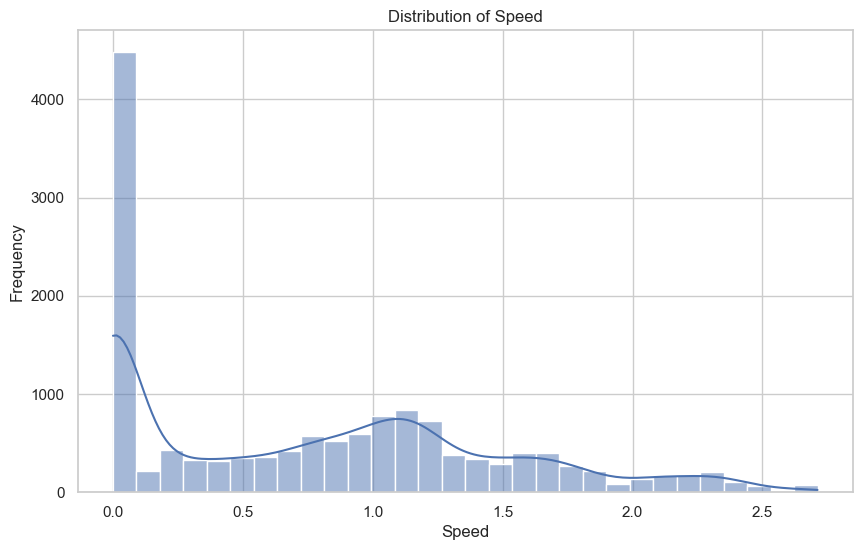

-----------------------------------------------
Descriptive Statistics for Speed
-----------------------------------------------
Mean     =  0.7717356894316374
median   =  0.76
mode     =  0.0
var      =  0.49766493201553696
std      =  0.7054537065006725
------------------------------------------------


In [18]:

features = ['Speed', 'Distance', 'Acc X', 'Acc Y', 'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z']

sns.set(style="whitegrid")

summary_stats = pd.DataFrame(columns=['Feature', 'Mean', 'Median', 'Mode', 'Variance', 'Std Dev'])

#for feature in features:
plt.figure(figsize=(10, 6))
sns.histplot(fd['Speed'], bins=30, kde=True)
plt.title(f'Distribution of {'Speed'}')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()
    
print('-----------------------------------------------')
print('Descriptive Statistics for Speed')
print('-----------------------------------------------')

print('Mean     = ',fd['Speed'].mean())
print('median   = ',fd['Speed'].median())
print('mode     = ',fd['Speed'].mode()[0])
print('var      = ',fd['Speed'].var())
print('std      = ',fd['Speed'].std())
print('------------------------------------------------')
   

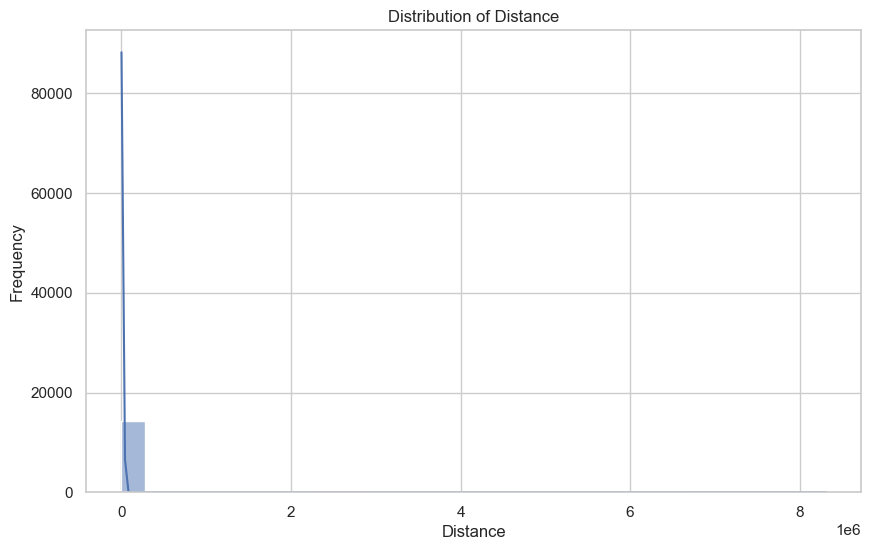

-----------------------------------------------
Descriptive Statistics for Distance
-----------------------------------------------
Mean     =  2794.960543058756
median   =  1007.3687
mode     =  311.2332
var      =  14541004894.253374
std      =  120586.08914071877
------------------------------------------------


In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['Distance'], bins=30, kde=True)
plt.title(f'Distribution of {'Distance'}')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

print('-----------------------------------------------')
print('Descriptive Statistics for Distance')
print('-----------------------------------------------')

print('Mean     = ',fd['Distance'].mean())
print('median   = ',fd['Distance'].median())
print('mode     = ',fd['Distance'].mode()[0])
print('var      = ',fd['Distance'].var())
print('std      = ',fd['Distance'].std())
print('------------------------------------------------')
   

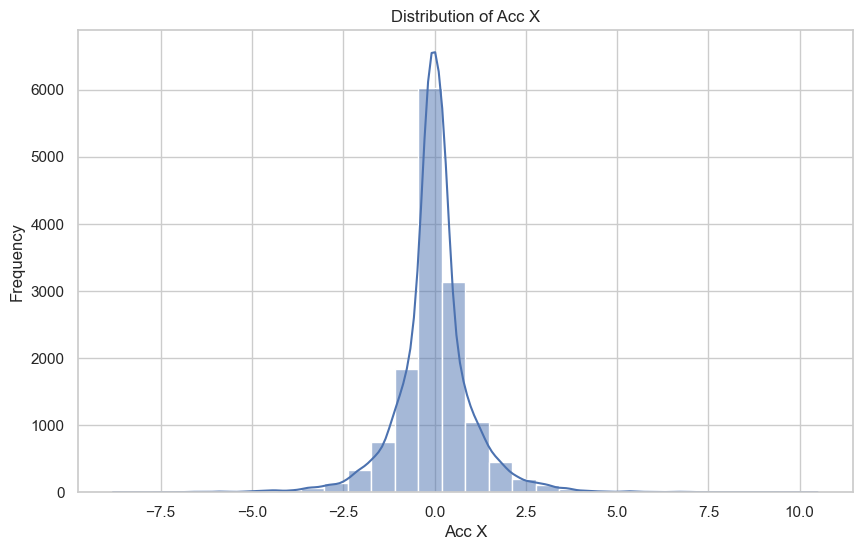

-----------------------------------------------
Descriptive Statistics for Acc X
-----------------------------------------------
Mean     =  -0.0011880672891430952
median   =  -0.013089776
mode     =  -0.4364062
var      =  1.0627273434271258
std      =  1.030886678266397
------------------------------------------------


In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['Acc X'], bins=30, kde=True)
plt.title(f'Distribution of {'Acc X'}')
plt.xlabel('Acc X')
plt.ylabel('Frequency')
plt.show()

print('-----------------------------------------------')
print('Descriptive Statistics for Acc X')
print('-----------------------------------------------')

print('Mean     = ',fd['Acc X'].mean())
print('median   = ',fd['Acc X'].median())
print('mode     = ',fd['Acc X'].mode()[0])
print('var      = ',fd['Acc X'].var())
print('std      = ',fd['Acc X'].std())
print('------------------------------------------------')
   

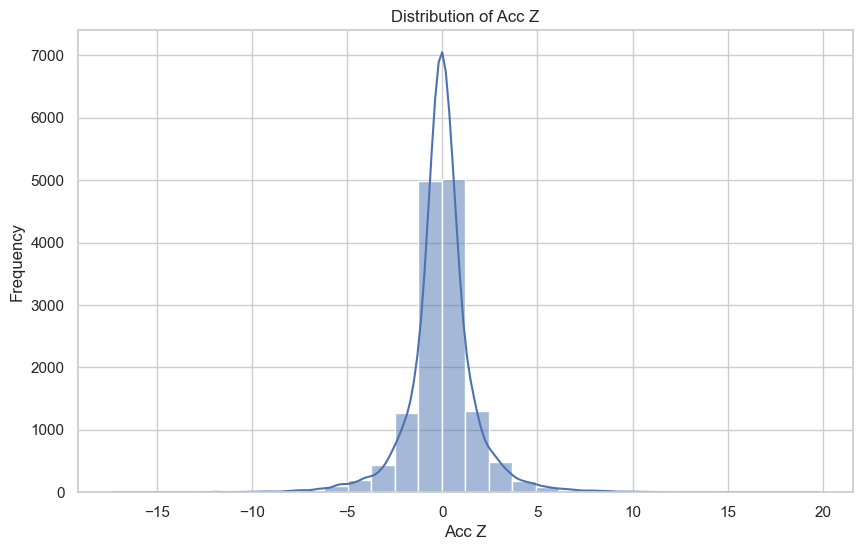

-----------------------------------------------
Descriptive Statistics for Acc Z
-----------------------------------------------
Mean     =  -0.023519970518492535
median   =  -0.025561735
mode     =  0.3979577
var      =  3.1280602994219
std      =  1.7686323245439963
------------------------------------------------


In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['Acc Z'], bins=30, kde=True)
plt.title(f'Distribution of {'Acc Z'}')
plt.xlabel('Acc Z')
plt.ylabel('Frequency')
plt.show()

print('-----------------------------------------------')
print('Descriptive Statistics for Acc Z')
print('-----------------------------------------------')

print('Mean     = ',fd['Acc Z'].mean())
print('median   = ',fd['Acc Z'].median())
print('mode     = ',fd['Acc Z'].mode()[0])
print('var      = ',fd['Acc Z'].var())
print('std      = ',fd['Acc Z'].std())
print('------------------------------------------------')
  


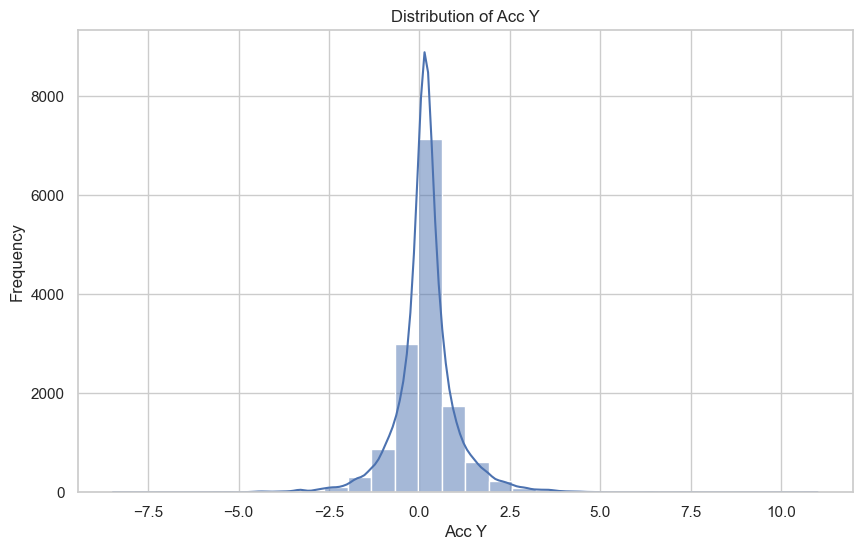

-----------------------------------------------
Descriptive Statistics for Acc Y
-----------------------------------------------
Mean     =  0.18017331979886306
median   =  0.16715336
mode     =  -0.21926403
var      =  0.7008804078044555
std      =  0.8371860054996473
------------------------------------------------


In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['Acc Y'], bins=30, kde=True)
plt.title(f'Distribution of {'Acc Y'}')
plt.xlabel('Acc Y')
plt.ylabel('Frequency')
plt.show()
print('-----------------------------------------------')
print('Descriptive Statistics for Acc Y')
print('-----------------------------------------------')

print('Mean     = ',fd['Acc Y'].mean())
print('median   = ',fd['Acc Y'].median())
print('mode     = ',fd['Acc Y'].mode()[0])
print('var      = ',fd['Acc Y'].var())
print('std      = ',fd['Acc Y'].std())
print('------------------------------------------------')
  

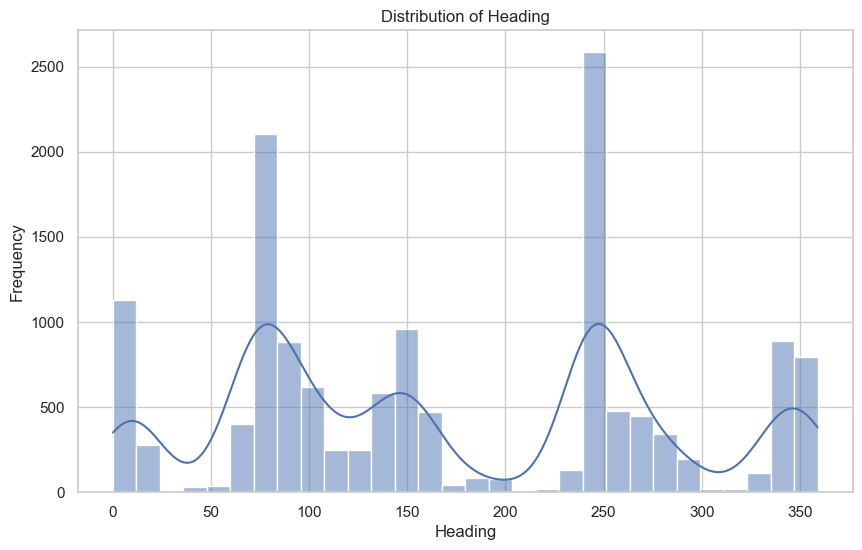

-----------------------------------------------
Descriptive Statistics for Acc Y
-----------------------------------------------
Mean     =  0.18017331979886306
median   =  0.16715336
mode     =  -0.21926403
var      =  0.7008804078044555
std      =  0.8371860054996473
------------------------------------------------


In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['Heading'], bins=30, kde=True)
plt.title(f'Distribution of {'Heading'}')
plt.xlabel('Heading')
plt.ylabel('Frequency')
plt.show()

print('-----------------------------------------------')
print('Descriptive Statistics for Acc Y')
print('-----------------------------------------------')

print('Mean     = ',fd['Acc Y'].mean())
print('median   = ',fd['Acc Y'].median())
print('mode     = ',fd['Acc Y'].mode()[0])
print('var      = ',fd['Acc Y'].var())
print('std      = ',fd['Acc Y'].std())
print('------------------------------------------------')
  

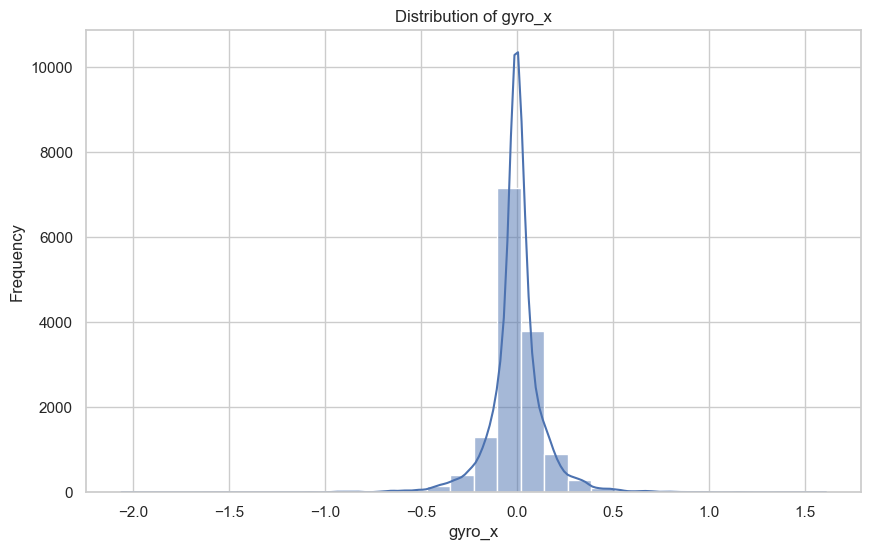

-----------------------------------------------
Descriptive Statistics for gyro_x
-----------------------------------------------
Mean     =  -0.00131616638802723
median   =  -0.002219477
mode     =  -0.003319033
var      =  0.019887830131196275
std      =  0.14102421824352113
------------------------------------------------


In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['gyro_x'], bins=30, kde=True)
plt.title(f'Distribution of {'gyro_x'}')
plt.xlabel('gyro_x')
plt.ylabel('Frequency')
plt.show()

  
print('-----------------------------------------------')
print('Descriptive Statistics for gyro_x')
print('-----------------------------------------------')

print('Mean     = ',fd['gyro_x'].mean())
print('median   = ',fd['gyro_x'].median())
print('mode     = ',fd['gyro_x'].mode()[0])
print('var      = ',fd['gyro_x'].var())
print('std      = ',fd['gyro_x'].std())
print('------------------------------------------------')
  

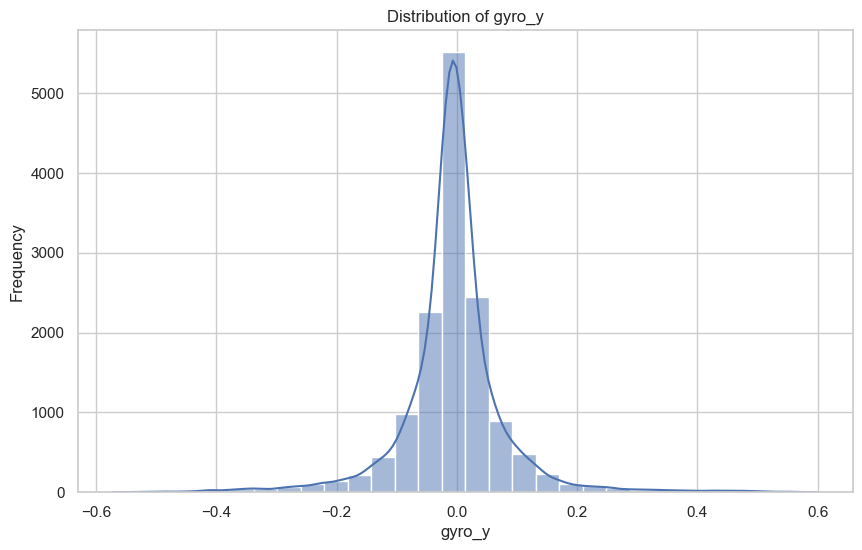

-----------------------------------------------
Descriptive Statistics for gyro_Y
-----------------------------------------------
Mean     =  -0.006517201196083936
median   =  -0.005782858
mode     =  -0.003950262
var      =  0.007716098998157361
std      =  0.0878413285313773
------------------------------------------------


In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['gyro_y'], bins=30, kde=True)
plt.title(f'Distribution of {'gyro_y'}')
plt.xlabel('gyro_y')
plt.ylabel('Frequency')
plt.show()

print('-----------------------------------------------')
print('Descriptive Statistics for gyro_Y')
print('-----------------------------------------------')

print('Mean     = ',fd['gyro_y'].mean())
print('median   = ',fd['gyro_y'].median())
print('mode     = ',fd['gyro_y'].mode()[0])
print('var      = ',fd['gyro_y'].var())
print('std      = ',fd['gyro_y'].std())
print('------------------------------------------------')
  

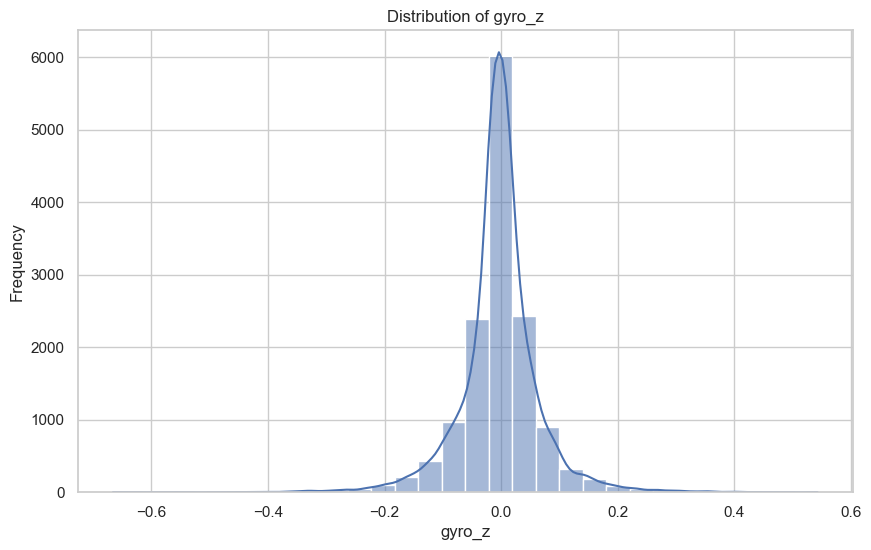

-----------------------------------------------
Descriptive Statistics for gyro_z
-----------------------------------------------
Mean     =  -0.003199591986034108
median   =  -0.002178762
mode     =  -0.011341739
var      =  0.004625308794858095
std      =  0.06800962281073242
------------------------------------------------


In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(fd['gyro_z'], bins=30, kde=True)
plt.title(f'Distribution of {'gyro_z'}')
plt.xlabel('gyro_z')
plt.ylabel('Frequency')
plt.show()

print('-----------------------------------------------')
print('Descriptive Statistics for gyro_z')
print('-----------------------------------------------')

print('Mean     = ',fd['gyro_z'].mean())
print('median   = ',fd['gyro_z'].median())
print('mode     = ',fd['gyro_z'].mode()[0])
print('var      = ',fd['gyro_z'].var())
print('std      = ',fd['gyro_z'].std())
print('------------------------------------------------')
 

In [27]:
    print('-----------------------------------------------')
    print('Descriptive Statistics for Speed')
    print('-----------------------------------------------')

    print('Mean     = ',fd['Speed'].mean())
    print('median   = ',fd['Speed'].median())
    print('mode     = ',fd['Speed'].mode()[0])
    print('var      = ',fd['Speed'].var())
    print('std      = ',fd['Speed'].std())
    print('------------------------------------------------')

-----------------------------------------------
Descriptive Statistics for Speed
-----------------------------------------------
Mean     =  0.7717356894316374
median   =  0.76
mode     =  0.0
var      =  0.49766493201553696
std      =  0.7054537065006725
------------------------------------------------


<Axes: >

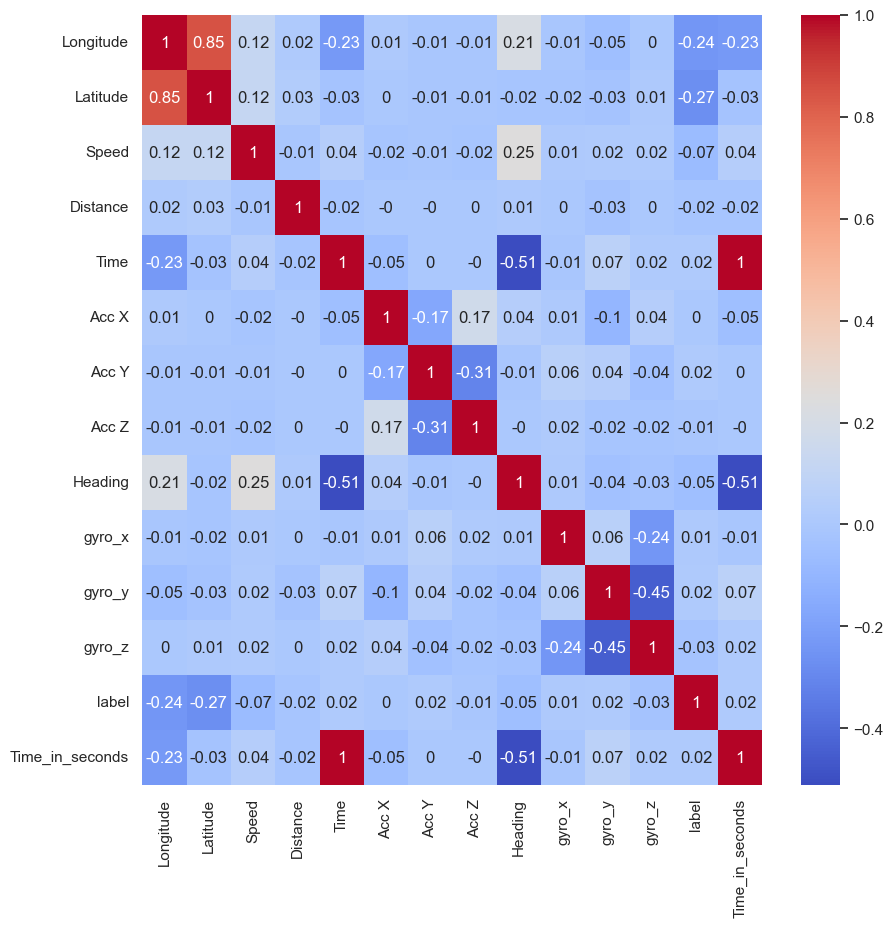

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(fd.corr().round(2),annot=True,cmap='coolwarm')


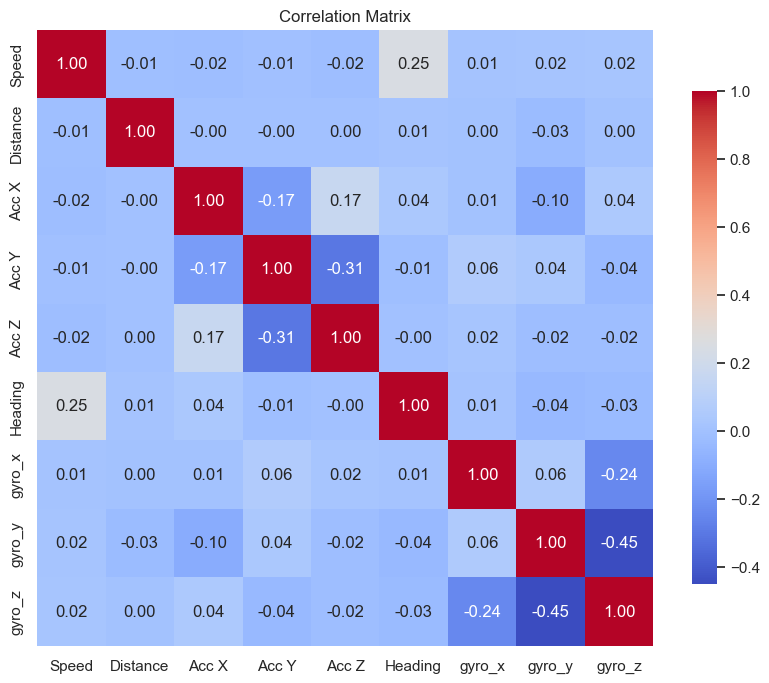

In [29]:
# plt.figure(figsize=(12, 10))
# for i in range(len(features)):
#     for j in range(i + 1, len(features)):
#         plt.subplot(len(features)-1, len(features)-1, i * (len(features)-1) + j)
#         plt.scatter(fd[features[i]], fd[features[j]], alpha=0.5)
#         plt.xlabel(features[i])
#         plt.ylabel(features[j])
#         plt.title(f'{features[i]} vs {features[j]}')

# plt.tight_layout()
# plt.show()

correlation_matrix = fd[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Test feature importance using statistical techniques.
# Run feature importance techniques (e.g., Random Forest feature importance) to assess which features are most Importatnt for anomaly detection

In [30]:
fd = fd.drop('Time', axis=1)


In [31]:
fd = fd.drop('Time_in_seconds', axis=1)


In [32]:
fd.head()

,Longitude,Latitude,Speed,Distance,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


In [33]:
from sklearn.model_selection import train_test_split

train_ta,test_ta=train_test_split(fd,train_size=.8  )

train_ta_x=train_ta.iloc[:,0:-1]
train_ta_y=train_ta.iloc[:,-1]

test_ta_x=test_ta.iloc[:,0:-1]
test_ta_y=test_ta.iloc[:,-1]

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_ta_x , train_ta_y)

RandomForestClassifier(n_estimators=10)

In [35]:
pred_rfc = rfc.predict(test_ta_x)

In [36]:
from sklearn.metrics import confusion_matrix , classification_report

In [37]:
tab_rfc = confusion_matrix(test_ta_y , pred_rfc)
tab_rfc


array([[1176,   31],
       [  39, 1604]], dtype=int64)

In [38]:
print(classification_report(test_ta_y, pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1207
           1       0.98      0.98      0.98      1643

    accuracy                           0.98      2850
   macro avg       0.97      0.98      0.97      2850
weighted avg       0.98      0.98      0.98      2850



In [39]:
fd.head()

,Longitude,Latitude,Speed,Distance,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


In [40]:
train_ta,test_ta=train_test_split(fd,train_size=.8  )

train_ta_x=train_ta.iloc[:,0:-1]
train_ta_y=train_ta.iloc[:,-1]

test_ta_x=test_ta.iloc[:,0:-1]
test_ta_y=test_ta.iloc[:,-1]

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_ta_x , train_ta_y)

DecisionTreeClassifier()

In [42]:
pred_test = dt.predict(test_ta_x)

In [43]:
tab1 = confusion_matrix(test_ta_y, pred_test)
tab1

array([[1095,   38],
       [  47, 1670]], dtype=int64)

In [44]:
print(classification_report(test_ta_y, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1133
           1       0.98      0.97      0.98      1717

    accuracy                           0.97      2850
   macro avg       0.97      0.97      0.97      2850
weighted avg       0.97      0.97      0.97      2850



In [45]:
rfc.feature_importances_

array([0.17156951, 0.13820745, 0.04298363, 0.25265174, 0.06091844,
       0.05701746, 0.03347353, 0.04415378, 0.08352628, 0.07720374,
       0.03829443])

In [59]:
feat_imp.sort_values('IMP' , ascending= False)

,Feature,IMP
3,Distance,0.252652
0,Longitude,0.171570
1,Latitude,0.138207
8,gyro_x,0.083526
9,gyro_y,0.077204
4,Acc X,0.060918
5,Acc Y,0.057017
7,Heading,0.044154
2,Speed,0.042984
10,gyro_z,0.038294


# Task --- Feature Engineering Refinement Create new interaction features (e.g., acceleration * gyroscope, speed * heading.....etc) to improve outlier detection sensitivity. 

In [60]:
import numpy as np

In [61]:
fd['Acc_Magnitude'] = np.sqrt(fd['Acc X']**2 + fd['Acc Y']**2 + fd['Acc Z']**2)       # Create new interaction features
fd['Gyro_Magnitude'] = np.sqrt(fd['gyro_x']**2 + fd['gyro_y']**2 + fd['gyro_z']**2)


In [62]:
fd.head()

,Longitude,Latitude,Speed,Distance,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label,Acc_Magnitude,Gyro_Magnitude
0,73.822661,18.501627,0.0,0.0,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0,0.317840,0.043979
1,73.822661,18.501627,0.0,0.0,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0,0.404996,0.038220
2,73.822661,18.501627,0.0,0.0,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0,0.546759,0.030402
3,73.822661,18.501627,0.0,0.0,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0,0.432064,0.018891
4,73.822661,18.501627,0.0,0.0,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0,0.545221,0.013510


In [63]:
fd['Acc-Gyro Interaction'] = fd['Acc_Magnitude'] * fd['Gyro_Magnitude']
fd['Speed-Heading Interaction'] = fd['Speed'] * fd['Heading']
fd['Acc-Speed Interaction'] = fd['Acc_Magnitude'] * fd['Speed']
fd['Gyro-Heading Interaction'] = fd['Gyro_Magnitude'] * fd['Heading']
#fd['Acc-Time Interaction'] = fd['Acc_Magnitude'] * fd['Time_sec']
fd['Speed-Distance Interaction'] = fd['Speed'] * fd['Distance']
fd['Acc-Distance Interaction'] = fd['Acc_Magnitude'] * fd['Distance']

In [64]:
fd.head()

,Longitude,Latitude,Speed,Distance,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label,Acc_Magnitude,Gyro_Magnitude,Acc-Gyro Interaction,Speed-Heading Interaction,Acc-Speed Interaction,Gyro-Heading Interaction,Speed-Distance Interaction,Acc-Distance Interaction
0,73.822661,18.501627,0.0,0.0,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0,0.317840,0.043979,0.013978,0.0,0.0,15.480450,0.0,0.0
1,73.822661,18.501627,0.0,0.0,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0,0.404996,0.038220,0.015479,0.0,0.0,13.453592,0.0,0.0
2,73.822661,18.501627,0.0,0.0,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0,0.546759,0.030402,0.016623,0.0,0.0,10.701622,0.0,0.0
3,73.822661,18.501627,0.0,0.0,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0,0.432064,0.018891,0.008162,0.0,0.0,6.649499,0.0,0.0
4,73.822661,18.501627,0.0,0.0,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0,0.545221,0.013510,0.007366,0.0,0.0,4.755479,0.0,0.0


In [65]:
z_scores_interaction = fd.apply(lambda x: (x - x.mean()) / x.std(ddof=0), axis=0)


In [66]:
Q1_interaction = fd.quantile(0.25)
Q3_interaction = fd.quantile(0.75)
IQR_interaction = Q3_interaction - Q1_interaction
outliers_iqr_interaction = (fd < (Q1_interaction - 1.5 * IQR_interaction)) | (fd > (Q3_interaction + 1.5 * IQR_interaction))


In [67]:
print("Interaction Features:")
print(fd[['Acc-Gyro Interaction', 'Speed-Heading Interaction', 'Acc-Speed Interaction', 
         'Gyro-Heading Interaction', 'Speed-Distance Interaction', 'Acc-Distance Interaction']])

print("\nZ-Scores for Interaction Features:")
print(z_scores_interaction[['Acc-Gyro Interaction', 'Speed-Heading Interaction', 'Acc-Speed Interaction', 
         'Gyro-Heading Interaction', 'Speed-Distance Interaction', 'Acc-Distance Interaction']])

print("\nIQR Outliers for Interaction Features:")
print(outliers_iqr_interaction[['Acc-Gyro Interaction', 'Speed-Heading Interaction', 'Acc-Speed Interaction', 
         'Gyro-Heading Interaction', 'Speed-Distance Interaction', 'Acc-Distance Interaction']])

Interaction Features:
       Acc-Gyro Interaction  Speed-Heading Interaction  Acc-Speed Interaction  \
0                  0.013978                        0.0                    0.0   
1                  0.015479                        0.0                    0.0   
2                  0.016623                        0.0                    0.0   
3                  0.008162                        0.0                    0.0   
4                  0.007366                        0.0                    0.0   
...                     ...                        ...                    ...   
14244              0.049179                        0.0                    0.0   
14245              0.015731                        0.0                    0.0   
14246              0.015731                        0.0                    0.0   
14247              0.015731                        0.0                    0.0   
14248              0.015731                        0.0                    0.0   

     

# Hyperparameter Tuning for Isolation Forest
# Test different contamination rates:
Start with a small range of contamination rates (e.g., 0.01 to 0.1) and record their impact on outlier detection.
Vary the max_samples parameter: Experiment with different max_samples settings (e.g., 0.5, 0.75, 1.0) to test model robustness.
Tune the number of estimators: Systematically adjust the number of estimators and document how this affects the number of anomalies.
Evaluate model runtime and efficiency: Track how different hyperparameters impact the speed and efficiency of the model.

In [68]:

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [69]:
X = fd[['Longitude', 'Latitude', 'Speed', 'Distance', 'Acc X', 'Acc Y', 'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z']]
y = fd['label']  # Assuming 'label' is the column for binary classification


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
contamination_rates = [0.01, 0.05, 0.1, 0.15, 0.2]


In [72]:

def evaluate_isolation_forest(contamination_rates):
    results = []
    for contamination in contamination_rates:
        # Create the Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        
        # Fit the model
        iso_forest.fit(X_train)

        # Predict anomalies (outliers) in the test set
        y_pred = iso_forest.predict(X_test)

        # Convert predictions (-1 for outliers, 1 for inliers) to binary labels (1 for outliers, 0 for inliers)
        y_pred = np.where(y_pred == 1, 0, 1)  # Invert the prediction for consistency

        # Calculate metrics
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results
        results.append({
            'contamination': contamination,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

    return pd.DataFrame(results)

results_df = evaluate_isolation_forest(contamination_rates)



In [73]:
print(results_df)


   contamination  precision    recall  f1_score
0           0.01   0.945946  0.013850  0.027301
1           0.05   0.891192  0.068065  0.126471
2           0.10   0.852332  0.130194  0.225884
3           0.15   0.845295  0.209735  0.336081
4           0.20   0.835991  0.290463  0.431131


In [74]:
best_contamination = results_df.loc[results_df['f1_score'].idxmax(), 'contamination']
iso_forest_best = IsolationForest(contamination=best_contamination, random_state=42)
iso_forest_best.fit(X_train)
y_pred_best = iso_forest_best.predict(X_test)
y_pred_best = np.where(y_pred_best == 1, 0, 1)


In [75]:
print(f"Best contamination rate: {best_contamination}")
print(classification_report(y_test, y_pred_best))

Best contamination rate: 0.2
              precision    recall  f1-score   support

           0       0.47      0.92      0.62      1748
           1       0.84      0.29      0.43      2527

    accuracy                           0.55      4275
   macro avg       0.65      0.60      0.53      4275
weighted avg       0.69      0.55      0.51      4275

